In [53]:
import pandas as pd
fake_news= pd.read_csv("Fake.csv")
Real_news= pd.read_csv("True.csv")

In [55]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
Real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [10]:
Real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [57]:
# Data preprocessing
import regex as re
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    return text


In [58]:
# Apply preprocessing
fake_news['text'] = fake_news['text'].apply(preprocess_text)

In [59]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017"


In [60]:
# Apply preprocessing
Real_news['text'] = Real_news['text'].apply(preprocess_text)

In [15]:
Real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",washington reuters the head of a conservative ...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,washington reuters transgender people will be ...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,washington reuters the special counsel investi...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,seattle washington reuters president donald tr...,politicsNews,"December 29, 2017"


In [61]:
# Add a label column to each dataset
fake_news['label'] = 'fake'
Real_news['label'] = 'real'

In [62]:
# Combine the datasets
df = pd.concat([fake_news[['title', 'text', 'label']], Real_news[['title', 'text', 'label']]])

In [18]:
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump just couldn t wish all americans ...,fake
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,fake
2,Sheriff David Clarke Becomes An Internet Joke...,on friday it was revealed that former milwauke...,fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,on christmas day donald trump announced that h...,fake
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,fake


In [19]:
df.duplicated().sum()

6062

In [63]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,title,text,label
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,no time to waste we ve got to fight with every...,fake
10924,MEDIA IGNORES Time That Bill Clinton FIRED His...,in its 109 year history only one f b i directo...,fake
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,who is silencing political speech physically ...,fake
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,they were probably just looking for a safe spa...,fake
15892,HOUSE INTEL Slaps Subpoenas on McCain Institut...,please see our previous report below on the mc...,fake
...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,on board a u s military aircraft reuters the u...,real
21403,U.S. puts more pressure on Pakistan to help wi...,washington reuters the united states suggested...,real
21405,Trump talks tough on Pakistan's 'terrorist' ha...,islamabad reuters outlining a new strategy for...,real
21408,"U.S., North Korea clash at U.N. forum over nuc...",geneva reuters north korea and the united stat...,real


In [64]:
df.duplicated().sum()

6062

In [65]:
df= df.drop_duplicates()


In [66]:
df.duplicated().sum()

0

## Exploratory Data Analysis

# 1. Import Required Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Optional: set a style for plots
sns.set(style="whitegrid")


# 2. Check Basic Information About the Data

In [26]:
# Check the first few rows of the dataset
print(df.head())

# Check the distribution of real vs. fake news
print(df['label'].value_counts())

# Get more detailed information
print(df.info())

# Summary statistics for text lengths
df['text_length'] = df['text'].apply(len)
print(df['text_length'].describe())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text label  
0  donald trump just couldn t wish all americans ...  fake  
1  house intelligence committee chairman devin nu...  fake  
2  on friday it was revealed that former milwauke...  fake  
3  on christmas day donald trump announced that h...  fake  
4  pope francis used his annual christmas day mes...  fake  
label
real    20929
fake    17907
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 38836 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   38836 non-null  object
 1   text    38836 non-nul

# 3. Visualize the Distribution of Real vs. Fake News

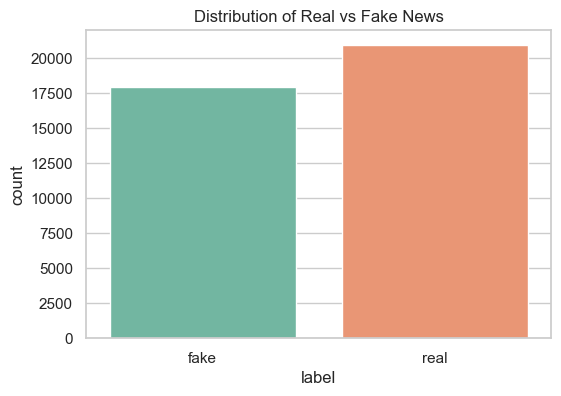

In [27]:
# Plot the distribution of real and fake news
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Distribution of Real vs Fake News")
plt.show()


# 4. Word Cloud Visualization

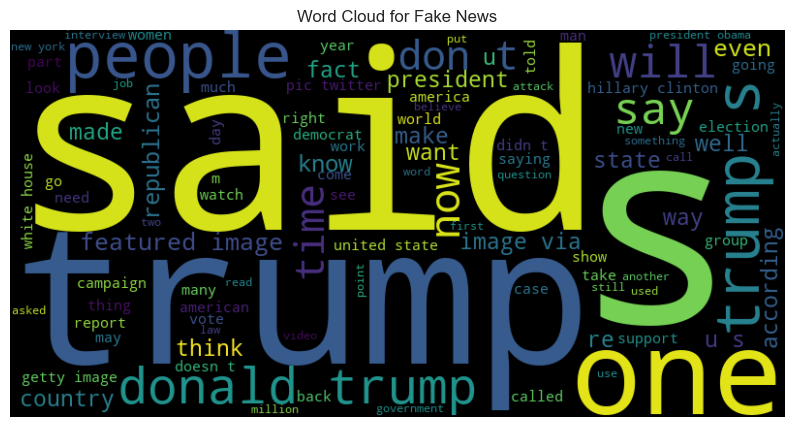

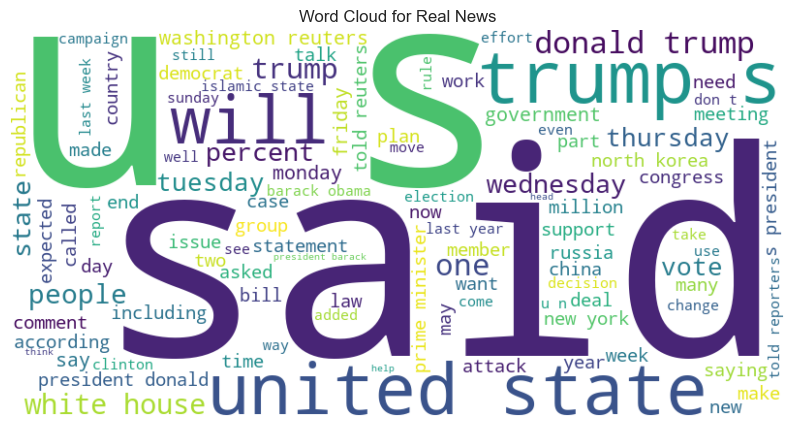

In [28]:
# Word cloud for fake news
fake_words = ' '.join(df[df['label'] == 'fake']['text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(fake_words)

plt.figure(figsize=(10, 6))
plt.imshow(fake_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Fake News")
plt.show()

# Word cloud for real news
real_words = ' '.join(df[df['label'] == 'real']['text'])
real_wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(real_words)

plt.figure(figsize=(10, 6))
plt.imshow(real_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for Real News")
plt.show()


# 5. Text Length Analysis

C:\Users\HP\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


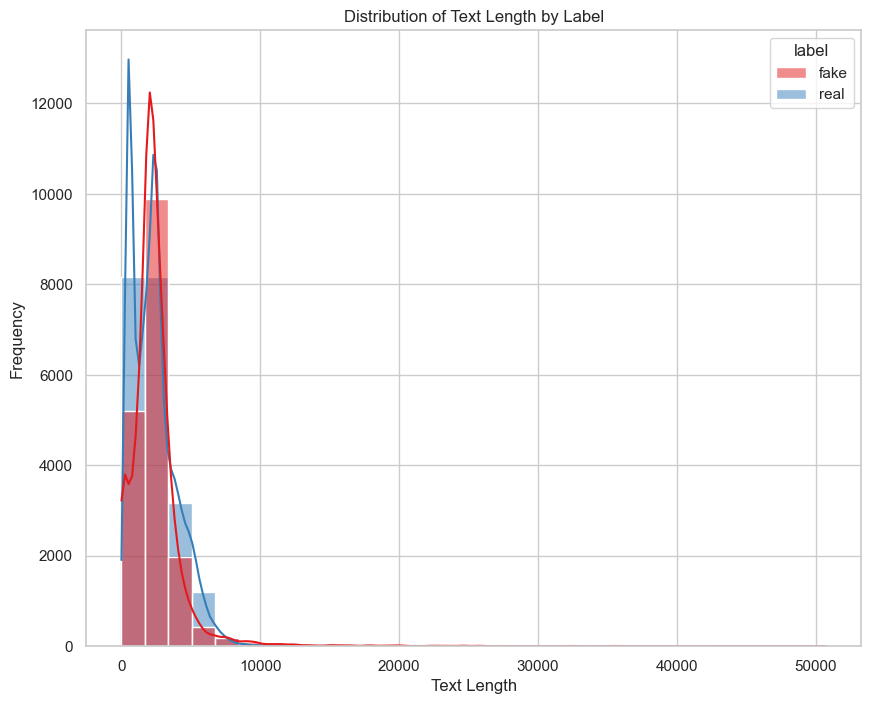

In [36]:
# Distribution of text lengths by label
plt.figure(figsize=(10,8))
sns.histplot(data=df, x='text_length', hue='label', kde=True, palette='Set1', bins=30)
plt.title("Distribution of Text Length by Label")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


# 6. Most Frequent Words in Each Category

C:\Users\HP\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


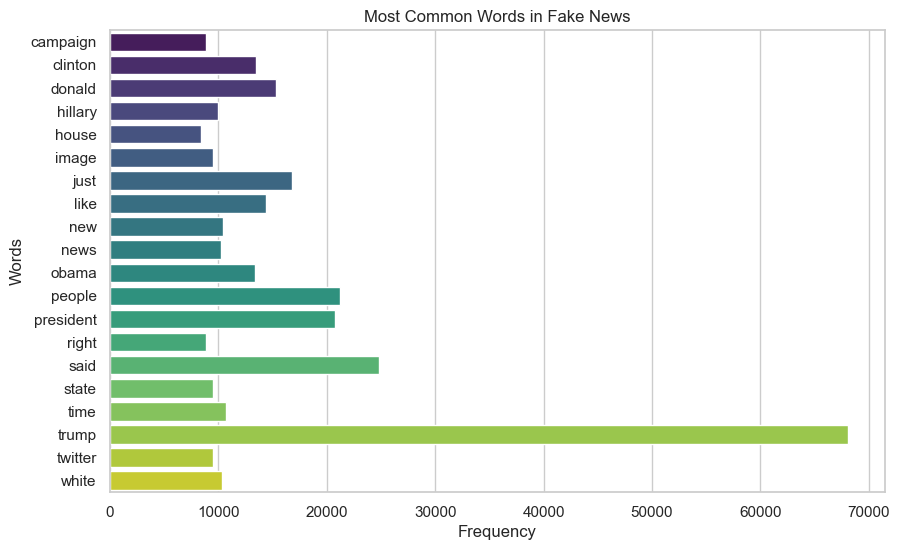

C:\Users\HP\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


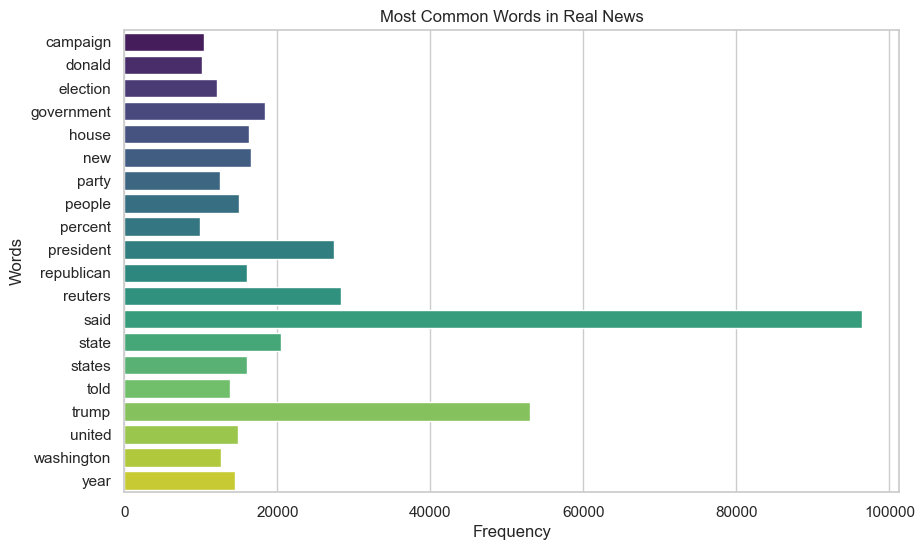

In [30]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot the most common words
def plot_most_common_words(text_data, title):
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    word_counts = vectorizer.fit_transform(text_data)
    words = vectorizer.get_feature_names_out()
    word_count_sum = word_counts.sum(axis=0).A1
    word_freq = dict(zip(words, word_count_sum))
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(word_freq.values()), y=list(word_freq.keys()), palette='viridis')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Most common words in fake news
plot_most_common_words(df[df['label'] == 'fake']['text'], "Most Common Words in Fake News")

# Most common words in real news
plot_most_common_words(df[df['label'] == 'real']['text'], "Most Common Words in Real News")


# 7. Bigrams Analysis

C:\Users\HP\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


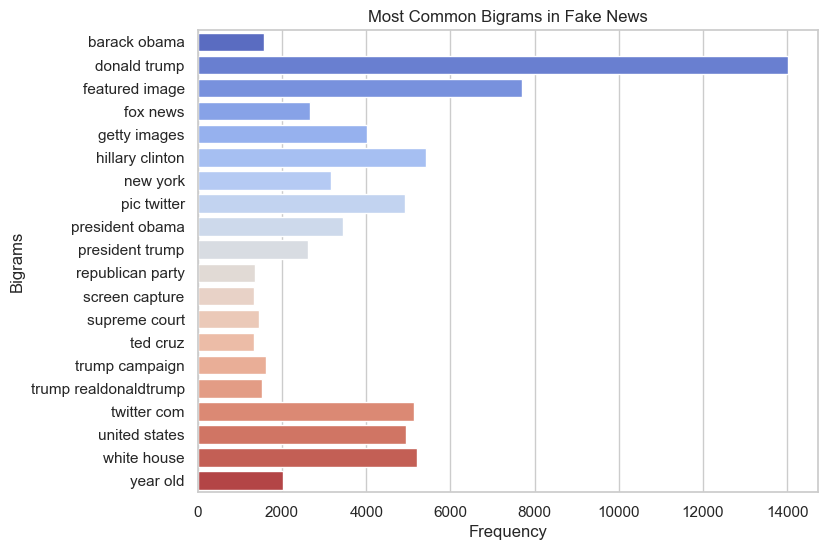

C:\Users\HP\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


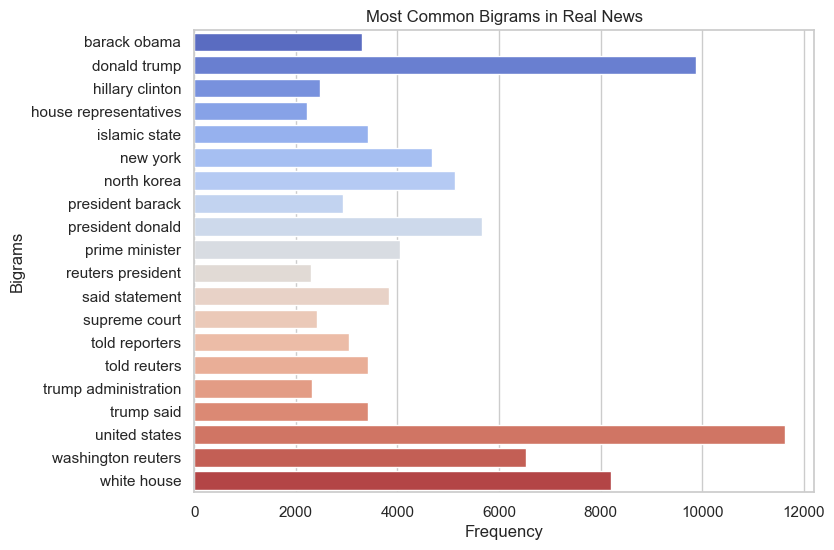

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_bigrams(text_data, title):
    vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
    bigrams = vectorizer.fit_transform(text_data)
    bigram_names = vectorizer.get_feature_names_out()
    bigram_count_sum = bigrams.sum(axis=0).A1
    bigram_freq = dict(zip(bigram_names, bigram_count_sum))
    
    # Plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(bigram_freq.values()), y=list(bigram_freq.keys()), palette='coolwarm')
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("Bigrams")
    plt.show()

# Bigrams in fake news
plot_bigrams(df[df['label'] == 'fake']['text'], "Most Common Bigrams in Fake News")

# Bigrams in real news
plot_bigrams(df[df['label'] == 'real']['text'], "Most Common Bigrams in Real News")


# 8. Check for Class Imbalance

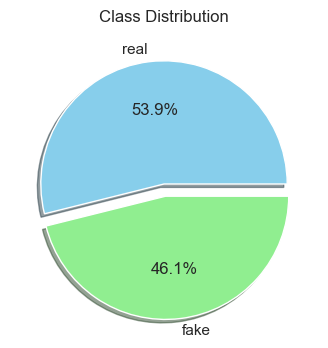

In [32]:
# Class distribution plot
plt.figure(figsize=(6,4))
df['label'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], explode=[0, 0.1], shadow=True)
plt.title("Class Distribution")
plt.ylabel('')
plt.show()


# Feature Extraction

# 1. TF-IDF (Term Frequency-Inverse Document Frequency)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Convert the result to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())


    00  000   10  100        11   12  120   13   14   15  ...  ypg  zealand  \
0  0.0  0.0  0.0  0.0  0.031552  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
1  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
2  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
3  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   
4  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  ...  0.0      0.0   

   zero  zika  zimbabwe  zinke  zone  zones  zor  zuma  
0   0.0   0.0       0.0    0.0   0.0    0.0  0.0   0.0  
1   0.0   0.0       0.0    0.0   0.0    0.0  0.0   0.0  
2   0.0   0.0       0.0    0.0   0.0    0.0  0.0   0.0  
3   0.0   0.0       0.0    0.0   0.0    0.0  0.0   0.0  
4   0.0   0.0       0.0    0.0   0.0    0.0  0.0   0.0  

[5 rows x 5000 columns]


# 4. Modeling

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


Prepare Data for Modeling
We will use TF-IDF features as an example.

In [70]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Transform the text data into TF-IDF features
X = tfidf_vectorizer.fit_transform(df['text']).toarray()
y = df['label'].apply(lambda x: 1 if x == 'real' else 0)  # Encode labels (real=1, fake=0)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression

In [71]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 0.986740473738414
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3564
           1       0.98      0.99      0.99      4204

    accuracy                           0.99      7768
   macro avg       0.99      0.99      0.99      7768
weighted avg       0.99      0.99      0.99      7768



Naive Bayes

In [72]:
# Initialize and train the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9228887744593203
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      3564
           1       0.92      0.94      0.93      4204

    accuracy                           0.92      7768
   macro avg       0.92      0.92      0.92      7768
weighted avg       0.92      0.92      0.92      7768



Naive Bayes Evaluation

Naive Bayes Accuracy: 0.9228887744593203
Naive Bayes Precision: 0.9234202490016443
Naive Bayes Recall: 0.9350618458610847
Naive Bayes F1-Score: 0.9292045857463656


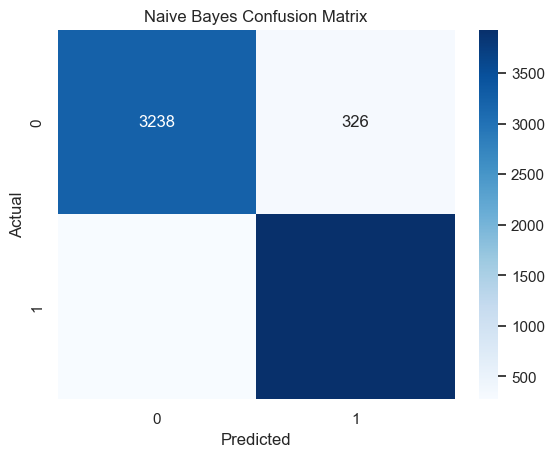

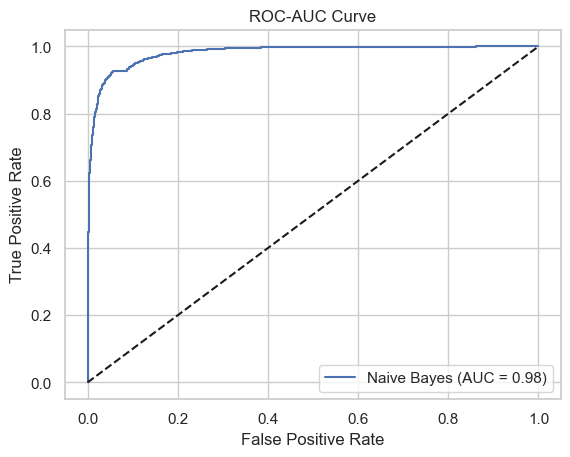

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the Naive Bayes model
y_pred_nb = nb.predict(X_test)
y_pred_proba_nb = nb.predict_proba(X_test)[:, 1]  # For ROC-AUC Curve

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Precision, Recall, F1-Score
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)
print("Naive Bayes F1-Score:", f1_nb)

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Curve
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


Deep Learning Model (LSTM)


For LSTM, you need to preprocess the text differently:

In [74]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['text'])

X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=300)  # Pad sequences to ensure uniform length

y = df['label'].apply(lambda x: 1 if x == 'real' else 0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=300))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("LSTM Accuracy:", accuracy)


C:\Users\HP\Anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
486/486 - 316s - 650ms/step - accuracy: 0.9491 - loss: 0.1420 - val_accuracy: 0.9775 - val_loss: 0.0767
Epoch 2/5
486/486 - 191s - 393ms/step - accuracy: 0.9561 - loss: 0.1233 - val_accuracy: 0.9703 - val_loss: 0.0957
Epoch 3/5
486/486 - 192s - 395ms/step - accuracy: 0.9719 - loss: 0.0851 - val_accuracy: 0.9767 - val_loss: 0.0750
Epoch 4/5
486/486 - 302s - 621ms/step - accuracy: 0.9789 - loss: 0.0625 - val_accuracy: 0.9776 - val_loss: 0.0680
Epoch 5/5
486/486 - 358s - 738ms/step - accuracy: 0.9833 - loss: 0.0496 - val_accuracy: 0.9602 - val_loss: 0.1170
LSTM Accuracy: 0.9602214097976685


LSTM Evaluation Metrics

243/243 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step
LSTM Accuracy: 0.960221421215242
LSTM Precision: 0.9365613091235149
LSTM Recall: 0.9938154138915318
LSTM F1-Score: 0.964339296018465


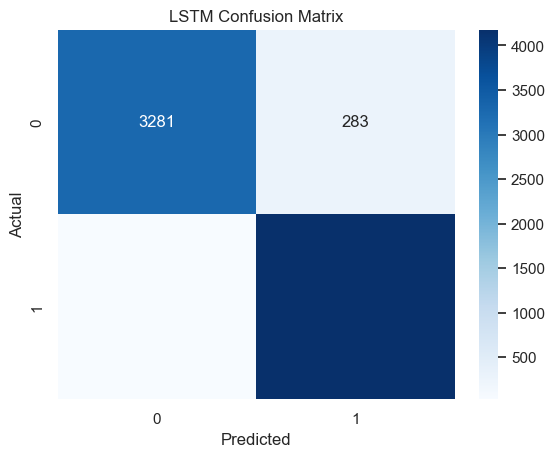

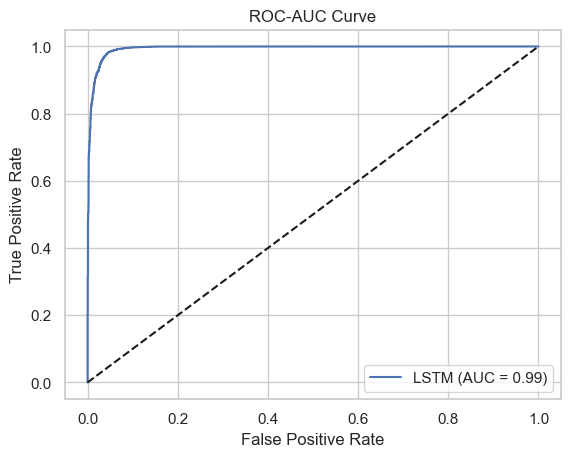

In [75]:
from sklearn.metrics import roc_auc_score, roc_curve

# Make predictions using the LSTM model
y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32").flatten()  # Convert probabilities to binary predictions
y_pred_proba_lstm = model.predict(X_test).flatten()  # For ROC-AUC Curve

# Accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)

# Precision, Recall, F1-Score
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
print("LSTM Precision:", precision_lstm)
print("LSTM Recall:", recall_lstm)
print("LSTM F1-Score:", f1_lstm)

# Confusion Matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC-AUC Curve
roc_auc_lstm = roc_auc_score(y_test, y_pred_proba_lstm)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_proba_lstm)
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {roc_auc_lstm:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


# Make Predictions

In [76]:
def preprocess_input(text, tokenizer, max_len=300):
    # Preprocess the text (similar to training data)
    text_sequence = tokenizer.texts_to_sequences([text])  # Convert text to sequences
    text_padded = pad_sequences(text_sequence, maxlen=max_len)  # Pad sequences to match input length
    return text_padded

def predict_news(text):
    # Preprocess the input text
    processed_text = preprocess_input(text, tokenizer)
    
    # Predict using the trained LSTM model
    prediction = model.predict(processed_text)[0][0]  # Get the prediction probability
    
    # Threshold the prediction to classify as 'real' or 'fake'
    if prediction > 0.5:
        return "Real News"
    else:
        return "Fake News"

# Example usage
input_text = "The government is planning to reduce taxes next year."
result = predict_news(input_text)
print(f"The given news is: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
The given news is: Real News
